# Ejercicio 1
● En un programa en Python (NumPy)
calcula los valores CMYK y HSI de la
imagen original RGB mediante las
ecuaciones de equivalencias.

● Utiliza la imagen
strawberries_coffee_full_color.png
para este ejercicio

<ipython-input-11-42d278ed2264>:95: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


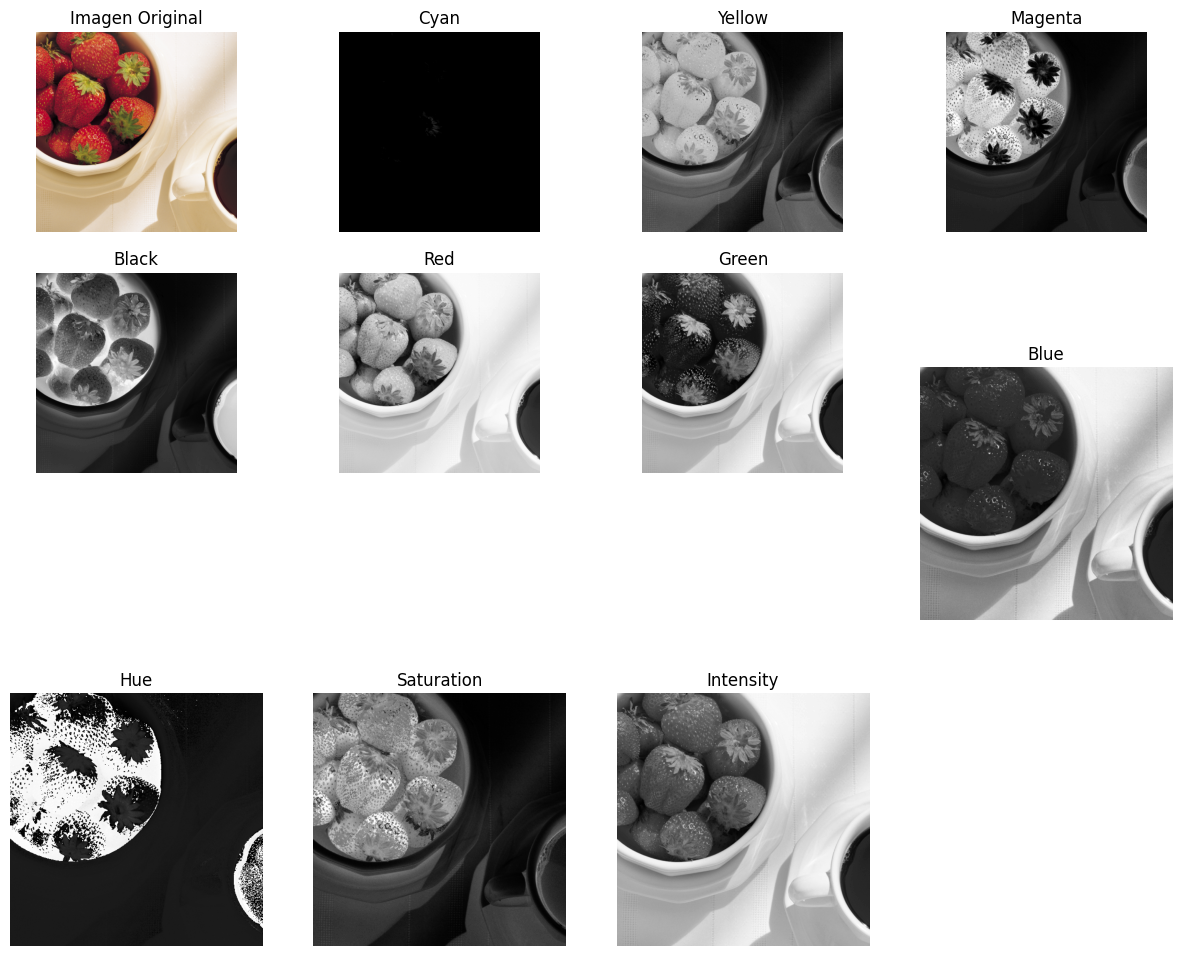

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb_to_cmyk(rgb_image):
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    k = 1 - np.max(rgb_image / 255, axis=2)
    c = (1 - r / 255.0 - k) / (1 - k + 1e-10)
    m = (1 - g / 255.0 - k) / (1 - k + 1e-10)
    y = (1 - b / 255.0 - k) / (1 - k + 1e-10)

    return c, m, y, k

def rgb_to_hsi(rgb_image):
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    r, g, b = r / 255.0, g / 255.0, b / 255.0

    intensity = 1/3 * (r + g + b)
    saturation = 1 - (3 / (r + g + b + 1e-10) * np.minimum(r, np.minimum(g, b)))

    theta = np.arccos((0.5 * ((r - g) + (r - b))) / (np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-10))
    hue = theta * (180 / np.pi)

    hue[np.isnan(hue)] = 0
    hue[b > g] = 360 - hue[b > g]

    return hue, saturation, intensity

FresaCafe = "strawberries_coffee_full_color.png"
image = cv2.imread(FresaCafe)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cmyk_values = rgb_to_cmyk(rgb_image)

hsi_values = rgb_to_hsi(rgb_image)

plt.figure(figsize=(15, 12))

plt.subplot(4, 4, 1)
plt.imshow(rgb_image)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(4, 4, 2)
plt.imshow(cmyk_values[0], cmap='gray', vmin=0, vmax=1)
plt.title("Cyan")
plt.axis("off")

plt.subplot(4, 4, 3)
plt.imshow(cmyk_values[2], cmap='gray', vmin=0, vmax=1)
plt.title("Yellow")
plt.axis("off")

plt.subplot(4, 4, 4)
plt.imshow(cmyk_values[1], cmap='gray', vmin=0, vmax=1)
plt.title("Magenta")
plt.axis("off")

plt.subplot(4, 4, 5)
plt.imshow(cmyk_values[3], cmap='gray', vmin=0, vmax=1)
plt.title("Black")
plt.axis("off")

plt.subplot(4, 4, 6)
plt.imshow(rgb_image[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title("Red")
plt.axis("off")

plt.subplot(4, 4, 7)
plt.imshow(rgb_image[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.title("Green")
plt.axis("off")

plt.subplot(3, 4, 8)
plt.imshow(rgb_image[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.title("Blue")
plt.axis("off")

plt.subplot(3, 4, 9)
plt.imshow(hsi_values[0] / 360.0, cmap='gray', vmin=0, vmax=1)
plt.title("Hue")
plt.axis("off")

plt.subplot(3, 4, 10)
plt.imshow(hsi_values[1], cmap='gray', vmin=0, vmax=1)
plt.title("Saturation")
plt.axis("off")

plt.subplot(3, 4, 11)
plt.imshow(hsi_values[2], cmap='gray', vmin=0, vmax=1)
plt.title("Intensity")
plt.axis("off")

plt.tight_layout()
plt.show()


# Ejercicio 2
● Realiza un programa que permita separar una
imagen a color lena_saturada.png en distintos
canales RGB y HSI (usar funciones de opencv)

● Imprime los resultados y observa los componentes
de cada canal de la imagen.

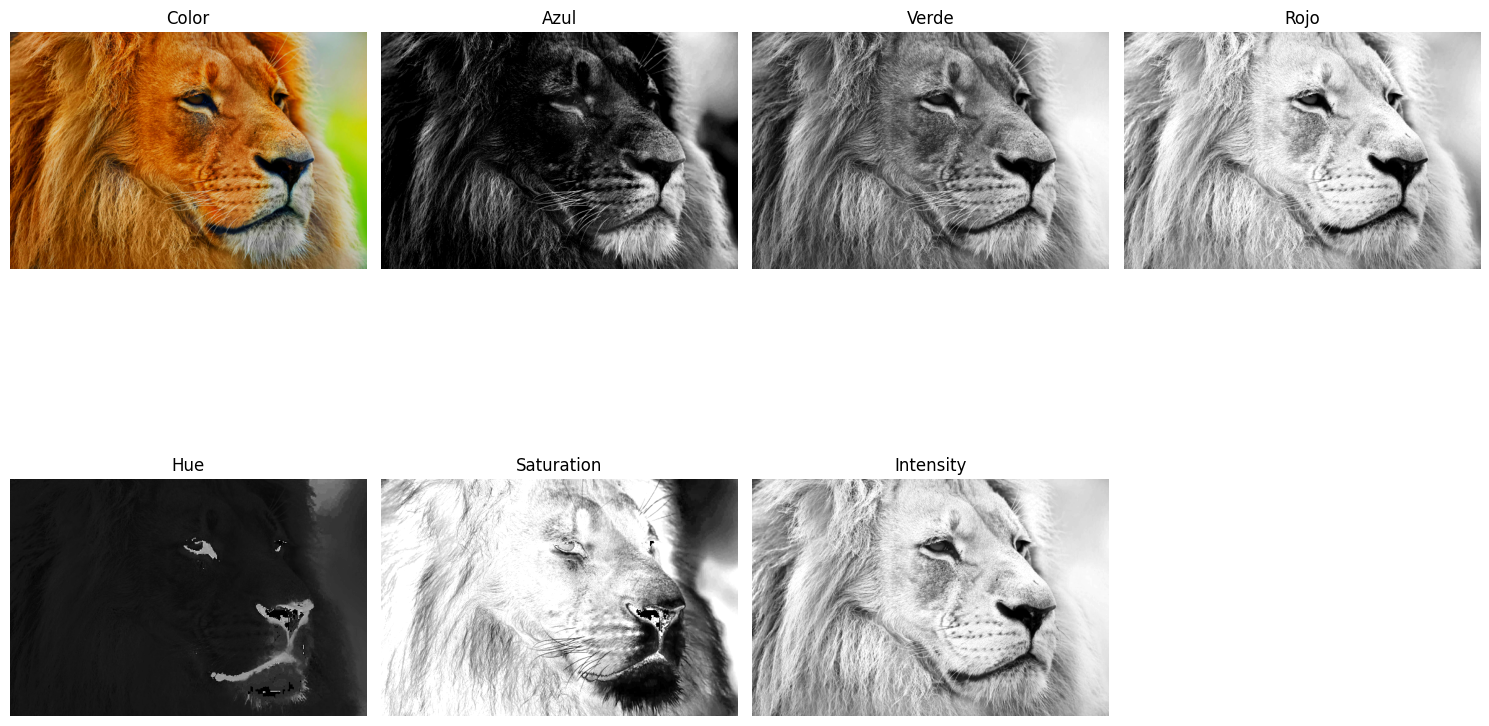

In [ ]:
img_color = cv2.imread('lion_saturated.png')

img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

B, G, R = cv2.split(img_color)
h, s, i = cv2.split(img_hsv)

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(img_color_rgb)
plt.title('Color')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(B, cmap='gray')
plt.title('Azul')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(G, cmap='gray')
plt.title('Verde')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(R, cmap='gray')
plt.title('Rojo')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(i, cmap='gray')
plt.title('Intensity')
plt.axis('off')

plt.tight_layout()
plt.show()


# Ejercicio 3

● Aplica el mismo programa del ejercicio anterior
utiliza la imagen degradada con ruido aditivo

● Observa las diferencias en los canales RGB y
HSI en ambos ejemplos.

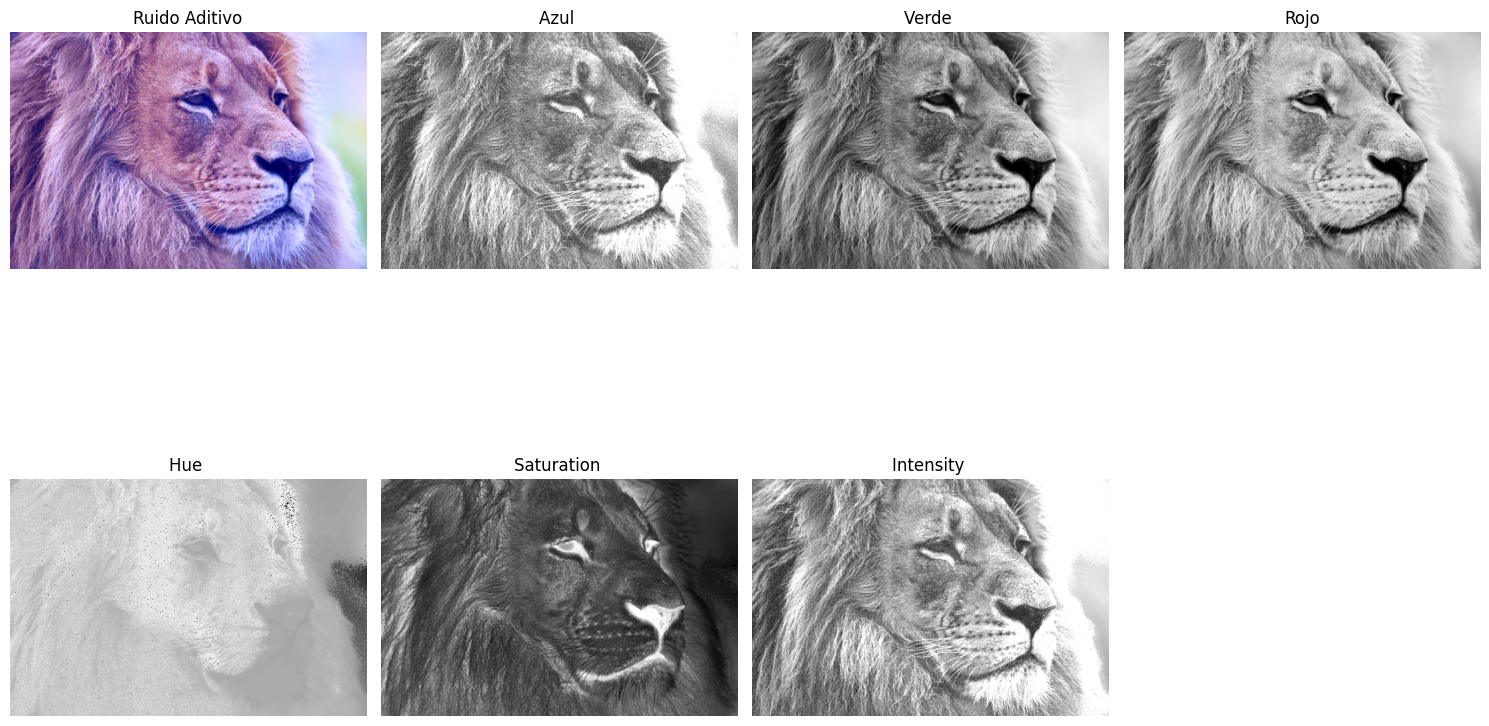

In [ ]:
img_color = cv2.imread('lion.png')

gauss_noise = np.zeros_like(img_color, dtype=np.uint8)
cv2.randn(gauss_noise, 128, 20)
gauss_noise = (gauss_noise * 0.75).astype(np.uint8)

gn_img = cv2.add(img_color, gauss_noise)

gn_img_hsv = cv2.cvtColor(gn_img, cv2.COLOR_BGR2HSV)

B_gn, G_gn, R_gn = cv2.split(gn_img)

h_gn, s_gn, i_gn = cv2.split(gn_img_hsv)

plt.figure(figsize=(15, 10))


plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(gn_img, cv2.COLOR_BGR2RGB))
plt.title('Ruido Aditivo')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(B_gn, cmap='gray')
plt.title('Azul ')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(G_gn, cmap='gray')
plt.title('Verde ')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(R_gn, cmap='gray')
plt.title('Rojo')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(h_gn, cmap='gray')
plt.title('Hue ')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(s_gn, cmap='gray')
plt.title('Saturation ')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(i_gn, cmap='gray')
plt.title('Intensity ')
plt.axis('off')

plt.tight_layout()
plt.show()
